In [1]:
import os
import shutil

import pandas as pd
import datetime
from itertools import repeat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\SABYA\\Aritar01\\CAP_106\\CAP_106_Research_Env'

In [3]:
path = "C:/Users/SABYA/Aritar01/CAP_106/Raw_Data"
# change the current working dir to path
os.chdir(path)
os.getcwd()

'C:\\Users\\SABYA\\Aritar01\\CAP_106\\Raw_Data'

In [4]:
# read the data
df = pd.read_excel("BA_106_merged_TMT_and_final_selected_features.xlsx")

In [6]:
# paths to store the correlation heatmaps and correlation dataframe
heat_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/Heatmaps"
data_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/CorrInfo"
graph_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/Graphs"

In [5]:
# computing the upper triangle correlation matrix
corr_mat_1 = df.corr().abs()
upper_tri_1 = corr_mat_1.where(np.triu(np.ones(corr_mat_1.shape), k=1).astype(np.bool))
upper_tri_1

,Max TMT,Total_Naphtha_Feed,Avg_COT,Total_Ds_Ratio,Wall_Fuel_Gas_Flow,Ground_Fuel_Gas_Flow,O2,CrossOverTemp_Coil1,CrossOverTemp_Coil2,CrossOverTemp_Coil3,...,CIP1,CIP2,CIP3,CIP4,CIP5,CIP6,BFW Rate,DS Temp,Feed Temp1,Feed Temp2
Max TMT,NaN,0.382751,0.446133,0.367343,0.315819,0.279833,0.401856,0.125794,0.154326,0.018304,...,0.429044,0.649345,0.614216,0.550327,0.632640,0.510934,0.024317,0.215830,0.047678,0.057289
Total_Naphtha_Feed,NaN,NaN,0.487057,0.976351,0.477741,0.547718,0.460509,0.117823,0.037453,0.006708,...,0.449031,0.455468,0.365872,0.341522,0.385243,0.322027,0.071894,0.208957,0.231862,0.036033
Avg_COT,NaN,NaN,NaN,0.495237,0.356496,0.256750,0.354739,0.147499,0.277626,0.317643,...,0.479368,0.519502,0.432514,0.400182,0.410587,0.330672,0.006592,0.242196,0.188259,0.078139
Total_Ds_Ratio,NaN,NaN,NaN,NaN,0.439169,0.502462,0.470517,0.120194,0.033390,0.033171,...,0.453142,0.443767,0.365711,0.348550,0.347673,0.291870,0.067695,0.215612,0.238814,0.006871
Wall_Fuel_Gas_Flow,NaN,NaN,NaN,NaN,NaN,0.486339,0.164369,0.041822,0.014043,0.091758,...,0.284164,0.278787,0.301465,0.263736,0.418696,0.216853,0.101468,0.209994,0.121266,0.016388
Ground_Fuel_Gas_Flow,NaN,NaN,NaN,NaN,NaN,NaN,0.371267,0.261607,0.275906,0.262775,...,0.158989,0.214256,0.130690,0.222768,0.291894,0.050165,0.007071,0.033928,0.109060,0.084235
O2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041993,0.070711,0.044606,...,0.095962,0.344604,0.262351,0.229719,0.266148,0.172550,0.092034,0.136069,0.053003,0.190974
CrossOverTemp_Coil1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.925082,0.769304,...,0.136531,0.037954,0.002745,0.119969,0.096566,0.021670,0.032522,0.053549,0.294766,0.128795
CrossOverTemp_Coil2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848552,...,0.060628,0.085072,0.016393,0.153506,0.141288,0.037868,0.002618,0.115414,0.186607,0.245256
CrossOverTemp_Coil3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.148659,0.139806,0.002884,0.195142,0.029581,0.023870,0.046321,0.068215,0.050228,0.157035


In [7]:
# store the corr dataframe for Naphtha Feed
df_TMT_corr = pd.DataFrame(corr_mat_1["Max TMT"].sort_values(ascending=True))
df_TMT_corr.to_excel(data_path + "/max_tmt_corr_info.xlsx")

In [8]:
df_TMT_corr

,Max TMT
CrossOverTemp_Coil3,0.018304
BFW Rate,0.024317
Feed Temp1,0.047678
Feed Temp2,0.057289
CrossOverTemp_Coil1,0.125794
CrossOverTemp_Coil5,0.140162
CrossOverTemp_Coil2,0.154326
CrossOverTemp_Coil4,0.179054
DS Temp,0.215830
Ground_Fuel_Gas_Flow,0.279833


In [6]:
# bulid one simple XGBoost Regression model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
# drop date column
date = df['Date']
df = df.drop(labels=['Date'], axis=1)

In [10]:
# Separate features and label
X, Y = df.drop(labels=['Max TMT'], axis=1), df['Max TMT']
X.shape, Y.shape

((11305, 22), (11305,))

In [11]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [12]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)
print('Train accuracy : ', r2_score(y_train, y_train_pred))
print('Test accuracy : ', r2_score(y_test, y_test_pred))
print(xgb.get_params())

Train accuracy :  0.9870947373298953
Test accuracy :  0.9304816063512685
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [13]:
from matplotlib import pyplot

In [14]:
print(xgb.feature_importances_)

[0.01251917 0.02237071 0.01886783 0.02545959 0.03784625 0.0424429
 0.0135694  0.01535782 0.02101489 0.02119126 0.02383376 0.0428181
 0.0330241  0.04705002 0.12845914 0.0857245  0.26092282 0.05680761
 0.0244364  0.01322764 0.0300492  0.02300692]


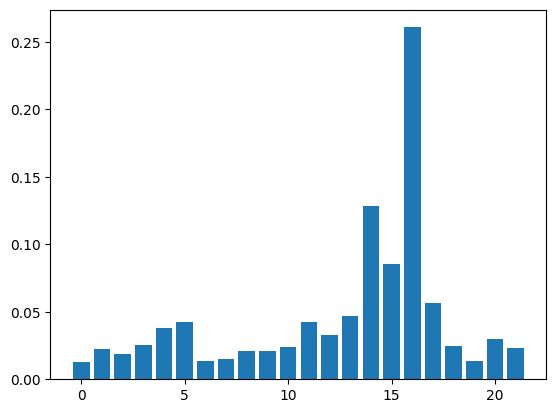

In [15]:
# plot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

<BarContainer object of 22 artists>

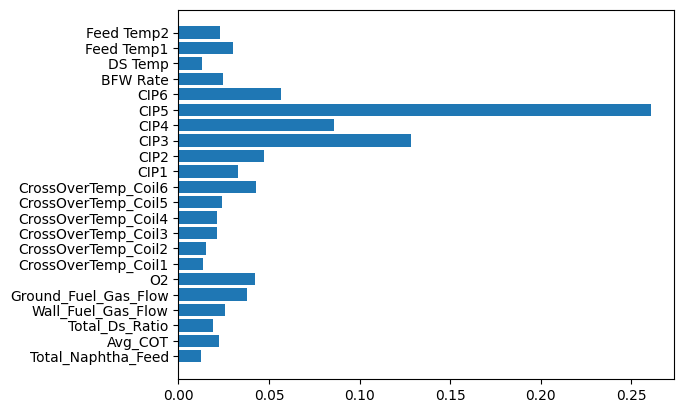

In [16]:
plt.barh(X.columns.tolist(), xgb.feature_importances_)

In [17]:
y_test

7654     1029.0
3598     1033.0
4258     1048.0
5888     1058.0
256      1046.0
          ...  
6973     1047.0
6126     1042.0
10385    1043.0
2364     1034.0
8209     1042.0
Name: Max TMT, Length: 3769, dtype: float64

In [18]:
y_test_pred

array([1030.2117, 1029.3937, 1043.8088, ..., 1052.8364, 1041.6222,
       1050.4557], dtype=float32)